# Lecture 9

- Parameter Estimation
- Confidence Intervals for Estimates


In [5]:
import numpy as np
import numpy.random as npr
import random
import itertools

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('ggplot')

import scipy.stats as stats

## Properties of Variance

Let $X$ be a random variable and $b$ and $c$ constant values.

1. $\operatorname{Var}[X] = E[X^2] - (E[X])^2 \geq 0$

2. $\operatorname{Var}[c] = 0$

3. $\operatorname{Var}[cX + b] = c^2 Var[X]$

4. **For independent random variables** (where knowing one does not change the distribution of the others), **the variance of the sum is the sum of the variances**,
\begin{align*}
\operatorname{Var}\left[\sum_{i=0}^{N-1} X_i \right] =
\sum_{i=0}^{N-1}  \operatorname{Var}\left[X_i \right].
\end{align*}

<!-- Analytically:

\begin{align*}
E[X] = \int_0^{\infty} x \lambda \exp^{-\lambda x}~dx =\lambda \int_0^{\infty} x \exp^{-\lambda x}~dx
\end{align*}

Need to apply integral by parts. -->

# Parameter Estimation

## Estimating Mean and Variance

Let $X=\{X_1,X_2,\cdots, X_N\}$ be independent observations that come from a common distribution.

### Estimating the Mean

Let $\mu_X$ denote the mean of the random variables. Then $\mu_X$ is usually estimated via the **sample mean** estimator, 

$$
\hat{\mu}_X = \frac{1}{N} \sum_{i=0}^{N-1} X_i
$$


The sample-mean estimator converges to the true mean if the variance of the distribution is finite.

In [6]:
n = 1000# number of samples

X = stats.norm(loc= 120,scale= 2) # generate samples from a normal distribution with mean 120 and std 2
Xvals =  X.rvs(n)
sums =  np.sum(Xvals)
avgs =  (1/n)*np.sum(Xvals)

print(avgs)

119.92906345656974


In [7]:

plt.plot(np.arange(1, n+1),____, label='Sample Mean')
plt.xlabel('Number of values in average');
plt.ylabel('Value');
plt.plot(np.arange(1,n+1), [120]*n, label='True Mean');
plt.legend();

NameError: name '____' is not defined

In [ ]:
# generate samples from the estimator hat u_x
num_sims = 10_000
avgs =np.zeros(num_sims)
m = 10000
for k in range(num_sims):
    Xvals = X.rvs(m)
    avg = np.sum(Xvals)/m
    avgs[k]= avg

expect_estimator = np.sum(avgs)/num_sims
print("the expected value of the estimator", expect_estimator)

**Evaluating bias via simulation**

Let's consider again what it means for the average (sample mean) to be an unbiased estimator.

<!---

 **It does not mean that the average converges to the true mean for large $N$ -- unbiased has nothing to do with the number of samples in the data.**
* Instead, it means that for any $N$, the expected value of the average is equal to the true mean.  
--->

We can estimate the expected value of an estimator through simulation by calculating the value of the estimator for many different random samples.

Then the expected value of the estimator is the average over all of those samples.
 
$$
\hat{\mu}_X = \frac{1}{N} \sum_{i=0}^{N-1} X_i
$$
 
 The expected value of $\hat \mu_X$:
  
$$
E (\hat{\mu}_X )= E\left( \frac{1}{N} \sum_{i=0}^{N-1} X_i\right) \approx \frac{1}{n}  \sum_{k=1}^n \hat \mu^k_X
$$
where $ \hat{\mu}_X = \frac{1}{N} \sum_{i=0}^{N-1} x^k_i$ for the $k$-th experiment with samples $[x^k_1,\ldots, x^k_N]$
 

Below is a simulation that estimates the expected value of the sample-mean estimator for $N=10$:

In [ ]:
num_sims = 10_000
avgs =np.zeros(num_sims)
m = 100

for k in range(num_sims):
    Xvals = X.rvs(m)
    avg = np.sum(Xvals)/m
    avgs[k]= avg

expect_estimator = np.sum(avgs)/num_sims
bias = expect_estimator - X.mean()
print("the expected value of the estimator", expect_estimator)
print('The bias is'+f'{ bias : 0.2f}')

In [ ]:
num_sims = 10_000
avgs =np.zeros(num_sims)
m = 100
vals= np.zeros(num_sims)

# g(u_x)= u_x^2
for k in range(num_sims):
    Xvals = X.rvs(m)
    avg = np.sum(Xvals)/m
    avgs[k]= avg
    vals[k]= avg**2

expect_func = np.sum(vals)/num_sims
print("the expected value of the function", expect_func)


The estimated mean of the sample-mean estimator is equal to the true mean, so this matches our theoretical result: the sample-mean estimator is unbiased.

### Estimating the Variance

Let $\sigma_{X}^{2}$ denote the variance of the random variables. Then there are two cases that should be considered for estimating the variance. 


**Known Mean:** First, consider the case where the mean of the random variables, $\mu_X$, is known. Let the sample-variance estimator for this case be defined by

$$\hat{\sigma^2_X} = \frac{1}{N}\sum_{i=1}^N (X_i-\mu_X)^2.$$


Note that the sample variance estimator depends on the mean. 


As with the sample-mean estimator, let's conduct a simulation to confirm that the sample-variance estimator is unbiased.  
$$E(\hat{\sigma}^2_X) = E\left( \frac{1}{N}\sum_{i=1}^N (X_i-\mu_X)^2 \right)  \approx \frac{1}{n}  \sum_{k=1}^n \hat{\sigma}^{2,k}_X  $$



where $\hat{\sigma}^{2,k}_X = \frac{1}{N} \sum_{i=0}^{N-1} (x^k_i-\mu_X)^2$ for the $k$-th experiment with samples $[x^k_1,\ldots, x^k_N]$, we perform the experiment $n$ times. 
 

In [ ]:
num_sims = 10_000
data_size = 10 # This is our N
mu = 120 # Assume mean known
X = stats.norm(mu, 2)

varlist = np.zeros(num_sims)

total_var = 0
for sim in range(num_sims):
    Xvals = X.rvs(data_size)
    var = (1/data_size)*np.sum((Xvals - mu)**2)  # estimate the variance from sample
    varlist[sim] = var
    
total_var  =  np.sum(varlist)
expc_var = total_var/num_sims

print('The estimated mean of the sample-variance estimator is' + f'{ expc_var: 0.2f}')


**Unknown Mean:** 

Now consider the case where the variance of the data is being estimated when the mean is unknown. If we want to apply the above sample-variance estimator, we will have to replace the true value of $\mu_X$ with its estimate $\hat{\mu}_X$, giving 

$$
\hat{\sigma}^2_X = \frac{1}{N}\sum_{i=1}^N (X_i-\hat{\mu}_X)^2.
$$

Let's run a simulation to check if this is an unbiased estimator:

In [ ]:
num_sims = 10_000
data_size = 10 # This is our N
mu = 120 # Assume mean known
X = stats.norm(mu, 2)

total_var = 0
for sim in range(num_sims):
    Xvals = X.rvs(data_size)
    mu_hat = Xvals.mean()
    var =  (1/data_size)*np.sum([(xi-mu_hat)**2 for xi in Xvals])
    total_var  += var  

print('The estimated mean of the sample-variance estimator is' +
      f'{total_var/num_sims: 0.2f}')

Is the result biased? Why?

## DISCUSSION:

These estimator of variance when mean is unknown is biased.

## Unbiased Estimator when the sample mean is unknown

Just multiply the previous estimator by a factor of $N/(N-1)$, which yields the following unbiased estimator: 
$$
\hat{\sigma^2_X} = \frac{1}{N-1}\sum_{i=1}^N (X_i-\hat{\mu}_X)^2.
$$

The change in denominator is often referred to as a *degrees-of-freedom (dof) correction*.

Simple interpretation:
* we started with the number of dof equal to the size of our data ($N$)
* used one dof in calculating the sample mean
* there are $N-1$ dofs remaining

Because a dof correction is so common in calculating the sample variance, NumPy supports passing a `ddof` parameter to `np.var()`, where `ddof` is the "Delta Degrees of Freedom".

In other words, we don't need to pass $N-1$, we only need to pass the difference from $N$, which is `ddof=1`. 

Let's test this:


In [ ]:
num_sims = 10_000
data_size = 10
mu = 120# Assume mean known
X = stats.norm(mu, 2)

total_var = 0
for sim in range(num_sims):
    Xvals = X.rvs(data_size)
    mu_hat = Xvals.mean()
    # var =  (1/(data_size-1))*np.sum([(xi-mu_hat)**2 for xi in Xvals])
    var = Xvals.var(ddof = 1) # unbiased estimator for the variance.
    total_var  += var  

print('The estimated mean of the sample-variance estimator is' +
      f'{total_var/num_sims: 0.2f}')

Is the result biased? Why?

### Notation

Let's introduce to distinguish between unbiased and biased variance estimators and variance estimates. 

Consider data $\mathbf{x} =  \left[ x_0, x_1, \ldots, x_{n -1} \right]$ with sample average $\hat{\mu}_X$. 

We will use an uppercase $S$ to indicate an estimator and a lowercase $s$ to indicate an estimate.

A subscript of $n$ indicates division by $n$ and is thus a biased estimator/estimate.

A subscript of $n-1$ indicates division by $n-1$ and is thus an unbiased estimator/estimate. 

\begin{align*}
S_{n}^{2} &= \frac 1 {n} \sum_{i=0}^{n-1} \left( X_i - \hat{\mu}_X  \right)^2, &&\mbox{ (biased)} \\
S_{n-1}^{2} &= \frac 1 {n-1} \sum_{i=0}^{n-1} \left( X_i - \hat{\mu}_X \right)^2 &&\mbox{ (unbiased).}\\
\end{align*}


# Confidence Intervals for Estimates

The parameter estimates we have considered up to this point are point estimates: they are single numerical values computed from the data.

Point estimates are commonly used, but they inherently do not provide any quantification of the ambiguity or reliability of the estimate. 

An *interval estimate* is an alternative that provides more information:

**interval estimate**
>   Given a vector of observed values $\mathbf{x}$ from a common distribution, an *interval estimate* for a parameter $\theta$ is an interval $[a,b]$ that is likely to contain the true value of $\theta$ according to some criterion.

The most common interval estimates are confidence intervals for the estimate.

## Example:
A random sample Xvals below,   is given from a distribution with known variance $Var(X_i)=4$.   Find an approximate 95%
 confidence interval for the mean of the underlying distribution $X_i$.

In [ ]:
Xvals= np.array([119.3963636 , 123.223853  , 120.61138011, 116.25379408,
       116.2317848 , 124.08760236, 115.6569442 , 121.02301463,
       118.21025603, 122.28635709]) 

1. first step, let's compute the distance d such that $[\hat{ u}_X -d, \hat{ u}_X+d]$ contains the true mean $\mu_X$ with a high probability of 95\%.

Recall in lecture, we obtain $d \ge  Q(\alpha/2) \sqrt{\frac{\sigma^2}{N}}$ where $Q$ is the survival function of the Standard Gaussian distribution. 


In [ ]:
alpha = 0.05

In [ ]:
N =len(Xvals)
varX = 4 # this is given

In [ ]:
G0= stats.norm() # this is a standard gaussian with mean 0 and var 1
G0.isf(alpha/2) # the Q(\alpha/2) part

In [ ]:
d = G0.isf(alpha/2) * np.sqrt(varX/N)
# this is the distance d to be used to construct the upper and lower bounds for confidence interval

2. Second step, after calculating the distance d, we can then compute the confidence interval using the sampled value of $\hat{\mu}_X$ and the distance d. Note that d is invariant from the samples. It only depends on the variance of the underlying RV. and the number of samples.

In [ ]:
CI = [Xvals.mean()-d, Xvals.mean()+d]
print("The 95% confidence interval is ", CI)

In [ ]:
# the remainder is a different way to compute the confidence interval. skipping it for now. we will continue after the spring break

In [ ]:

data_size = 10 # This is our N
X = stats.norm(120, 2)
 
# generate samples from the random variable.
Xvals = X.rvs(data_size)
Xvals

In [ ]:
# num_sims = 100_00

mean_est =  
Y = stats.norm(mean_est,  )  # fill out, what is the variance of the mean estimate? given we know the variance of X.
Y.interval(0.95)

## Bootstrap Confidence Intervals for Estimates

Confidence intervals are easily generated for any parameter estimates by using bootstrap sampling.

To generate a $c$% confidence interval, the bootstrap distribution of the estimator is generated, and then a region containing the center $c$% of the probability is determined. 

In [ ]:
# checking the upper bound.

Y.isf(0.025) 

# Bootstrap to compute a confidence interval
 When the underlying distribution is unknown

Let's illustrate this with an example.   The code below takes data and a confidence interval and provides a point estimate and a confidence interval for the mean of the distribution of the data: 

In [9]:
def find_mean_CI(x, C): # C : confidence level 95 # x: given sample from unknown distribution

    n = len(x)
    
    # Calculate percentiles for each edge of the CI
    alpha =  (100-C)
    
    avg =  x.mean()
    
    # Now do bootstrap sampling
    # Start by specifying the number of bootstrap values to simulate
    num_bs_sims = 1000
    
    # Create an array of zeros to store the bootstrap values
    bs_averages = np.zeros(num_bs_sims)
    
    for bs_sim in range(num_bs_sims):
    #Complete this part
        bs_sample = npr.choice(x, n)
        bs_avg = bs_sample.mean()
        bs_averages[bs_sim] = bs_avg # \hat{u}_x^i
        
    # Now find the values that define the C%  
    percentiles = np.percentile(bs_averages, [alpha/2, 100 -  alpha/2] )
    
    print(f'The mean estimate is {avg:.2f}')
    print(f'A {C}% confidence interval for the average is [{percentiles[0]: .2f}, {percentiles[1]:.2f}]')

Here are the 90%, 95%, and 99% confidence intervals for the mean estimate of a small example data set:

In [10]:
x = np.array([ 1, 1.2, 1.4, 1.2, 1, 1.2, 1.5, 1.45, 1.05, 1.65, 1.8])
find_mean_CI(x, 90)

The mean estimate is 1.31
A 90% confidence interval for the average is [ 1.19, 1.45]


In [11]:
find_mean_CI(x, 95)

The mean estimate is 1.31
A 95% confidence interval for the average is [ 1.17, 1.47]


In [12]:
find_mean_CI(x, 99)

The mean estimate is 1.31
A 99% confidence interval for the average is [ 1.14, 1.52]


**REMINDER**

Let's remind ourselves of what a $c$% confidence interval means:
* it does **not** mean that there is a $c$% probability that a particular confidence interval contains the true mean
* it means that over the long run, the true mean would lie in $c$% of the confidence intervals that are generated according to this procedure. 



For data sample sizes of less than approximately 100, the $c$% confidence intervals generated via bootstrap sampling are generally **not wide enough** to achieve the specified confidence. Let's illustrate this with an experiment:


The simulation below draws a data sample of 10 random values from a Normal (1, 2) distribution.
* For each sample, the sample mean is calculated, and bootstrap sampling is used to generate a 95% confidence interval for the sample mean.
* This process is repeated to find the sample mean and the confidence interval


In [17]:
num_sims = 500
data_size = 100

# True mean
mu = 1

X = stats.norm(mu,2 )

num_miss_true_mean = 0
for sim in range(num_sims):
    Xvals =  X.rvs(data_size)

    # Now do bootstrap sampling with this sample Xvals.
    num_bs_sims = 1000
    bs_averages = np.zeros(num_bs_sims)
    for bs_sim in range(num_bs_sims):
        bs_sample = npr.choice(Xvals, data_size)# todo 
        bs_avg = bs_sample.mean()
        bs_averages[bs_sim] = bs_avg

    percentiles = np.percentile(bs_averages, [2.5, 97.5])  # todo 
    if mu > percentiles[1] or mu< percentiles[0]: # condition when the true mean is not contained by the interval 
        num_miss_true_mean += 1

print('The probability a bootstrap CI does not contain the true mean is' 
      + f'{num_miss_true_mean/num_sims : 0.2f}')

The probability a bootstrap CI does not contain the true mean is 0.05


In the long run, we expect at least 5% of confidence intervals to not contain the true mean.

However, the bootstrap estimator for CIs is not conservative enough for small data.

The following simulation provides a more accurate estimate of the probability that the CI contains the true mean by running 2,000 simulations:

DISCUSSION

In [ ]:
# let's repeat this experiment with a larger set of samples for bootstrap sampling

Below is a table that shows the probability[^ci_probs] that a bootstrap sample does not contain the true mean for this distribution as a function of $N$:

| Data Size ($N$) | Probability CI does not contain true mean |
| :-: | :-: |
| 5 | 16.3% |
| 10 | 10.0% |
| 25 | 6.9% |
| 50 | 5.9% |
| 75 | 5.6% |
| 100 | 5.5% |


(If you have smaller data, more sophisticated methods are available -- see the refs in the textbook!)

### Confidence Intervals for Mean Estimate with Unknown Data Variance

If the standard deviation or variance of the distribution is not known, then we must estimate it. We will use the unbiased variance estimator, 
\begin{align*}
S_{n-1}^2 = \frac{1}{n-1}\sum_{i=0}^{n-1} \left(X_i-\hat{\mu}_X \right)^2.
\end{align*}


Recall that if $\hat{\mu}_X$ is Normal( $\mu_X, \sigma^2_X/n)$ , then 
$$
\frac{ X  - \mu_X}{\sigma_X/\sqrt{n}} \sim \mbox{Normal}(0,1).
$$

If we have to replace the true variance by its estimate, then the distribution changes. Using the unbiased variance estimator instead of the true variance, the distribution of

$$
\frac{\hat{\mu}-\mu_X }{S_{n-1}/\sqrt{n}}
$$

has a **Student’s $t$-distribution with $\nu = n-1$ degrees of freedom (dof)**, $t_\nu$.

(Like a Gaussian, but more spread out!)

## Student's $t$ Random Variable

The Student's $t$ random variable arises when estimating the mean $\mu$ of data from a Normal distribution for which the variance $\sigma^2$ is not known. 

The distribution takes its name from a paper by William Sealy Gosset that was published under the pen name *Student*.

**Student's $t$ random variable**
>   If $T$ is a Student's $t$ random variable with $\nu$ degrees of freedom, the pdf is
>   \begin{align*}
    f(t)=\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu \pi}  \Gamma\left(\frac{\nu}{2}\right)}\left(1+\frac{t^{2}}{\nu}\right)^{-(\nu+1) / 2}.
    \end{align*}


When $\nu \rightarrow \infty$, the Student's $t$ random variable converges to a normal random variable.


The degree of freedom(dof) in a student's t distribution is the number of samples minus one.
    
We can use SciPy.stats to create a standard Student's $t$ distribution by using `stats.t(dof)`:

In [18]:
T = stats.t(4)

The graph below shows the pdf of Student's $t$ random variables with different degrees of freedom

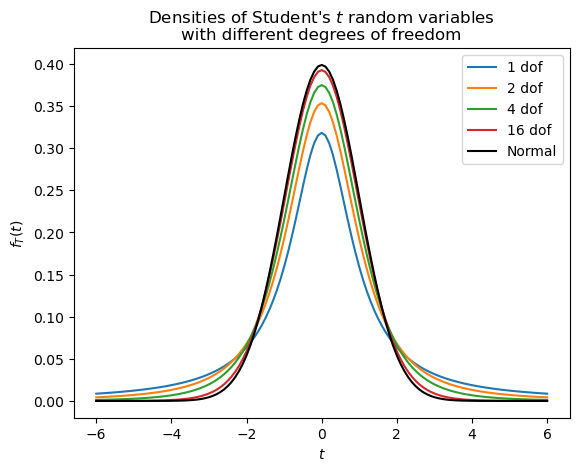

In [19]:
t = np.linspace(-6, 6, 121)
for d in [1, 2, 4, 16]:
    T = stats.t(d) # todo
    plt.plot(t, T.pdf(t), label=str(d) + " dof")

N = stats.norm() # todo
plt.plot(t, N.pdf(t), color="k", label="Normal")
plt.legend()
plt.title(
    "Densities of Student's $t$ random variables\nwith different degrees of freedom"
)
plt.xlabel("$t$")
plt.ylabel("$f_T(t)$");

Thus, the Student's $t$ random variable is similar to a standard normal random variable except that more of its probability density is spread out away from 0.

We can generate a SciPy distribution for a Student's $t$ variable of this form by setting the following parameters:
* The `df` parameter is set to the number of degrees of freedom, $\nu=n-1$
* The `loc` parameter is set to the true mean, $\mu_X$, and
* The `scale` parameter  is set to the **sample** standard error of the mean (SSEM), which is obtained from the SEM equation by replacing the standard deviation with its unbiased estimate, yielding $s_{n-1}= s_{n-1}/\sqrt{N}$


In [24]:
# Some sample data
x = [-9, -4, 1, 4, 9, 16]

In [21]:
n=len(x)

In [25]:
unbiased_var = np.var(x, ddof=1)
unbiased_var

80.56666666666668

In [27]:
var_est_mean = unbiased_var/n
var_est_mean

13.427777777777779

In [38]:
T0 = stats.t(df=n-1)
d = T0.isf(0.025)*np.sqrt(var_est_mean)
print(d)

9.419622691075126


In [39]:
# confidence interval 95%
CI = [np.mean(x)-d, np.mean(x)+d]
print(CI)

[-6.5862893577417925, 12.25295602440846]


Note that the SSEM can be computed from the data using the `stats.sem()` function:

In [40]:
sigma_t = stats.sem(x)
sigma_t
d2 = T0.isf(0.025)*stats.sem(x)
print(d2)
#this is the same value as d.

9.419622691075128


To create analytical confidence intervals with the standard deviation estimated from the data, we can again find a region $\left(\hat{\mu}_X -d, \hat{\mu}_X+d \right]$ that satisfies
\begin{align*}
 P\left(  \hat{\mu}_X  - \mu > d \right) = \alpha,
\end{align*}
where $\alpha = (1-c)/2$.  

In [42]:
#DEMO
# The data
x0= np.array([-0.41957876,  0.96561764,  1.63882274, -3.53066214, -1.75490733,
        4.89996147, -0.12762015, -0.68747518,  1.44907716,  0.21724457])

n0=len(x0)

# Set C and calculate alpha
C= 95/100
alpha = (1-C)

# Calculate the SSEM
sigma_t =  stats.sem(x0)


# Now create the scaled Student's t distribution object using SciPy
T0 =stats.t(df= n0-1,scale = 1)

# And now find the value of d using the inverse survival function
d = T0.isf(alpha/2)* sigma_t

# And find the confidence interval estimate
CI0 = [x0.mean() -d, x0.mean()+d]
print(CI0)

[-1.3395521879833674, 1.8696481919833676]


In [ ]:
# or we can directly use the confidence interval for 0.95 


In [ ]:
# the confidence interval estimated


Note that the confidence intervals produced using the Student's $t$ distribution are very similar to those produced by bootstrap sampling because the width of the confidence interval is now determined from the data.

Data samples 11 and 15 do not include the true mean for the analytical model with estimated variance.

Just like the bootstrap confidence intervals, the Student's $t$ model does not provide  confidence intervals that are conservative enough when the number of samples is small.

Various correction factors are available in the literature to provide better confidence intervals for small data samples.